In [43]:
import wave, struct, math # To calculate the WAV file content
from random import randint # To generate white noise
import numpy as np # To handle matrices
from PIL import Image # To open the input image and convert it to grayscale

import scipy                     # To plot the spectrogram
import matplotlib.pyplot as plt  # To plot the spectrogram
import scipy.io.wavfile          # To plot the spectrogram

File:  sound.wav
Sample rate (Hz):  44100


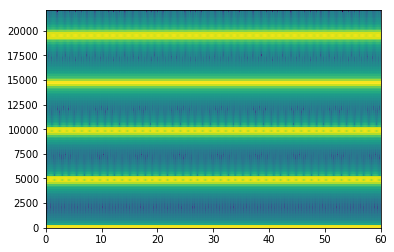

In [44]:
def plotSpectrogram(file="sound.wav"):
    sample_rate, X = scipy.io.wavfile.read(file)
    plt.specgram(X, Fs=sample_rate, xextent=(0,60))
    print("File: ", file)
    print("Sample rate (Hz): ",sample_rate)
plotSpectrogram()

In [45]:
'''
    Creates a WAV file which spectrogram depicts lines at chosen frequencies
'''
def linearFreqs(freqs, file="sound.wav", duration=1.0, sampleRate=44100.0):
    # freqs is an array of frequencies in Hertz
    # file is the path to the wav file to output into
    # sampleRate in hertz
    # duration seconds

    wavef = wave.open(file,'w')
    wavef.setnchannels(1) # mono
    wavef.setsampwidth(2) 
    wavef.setframerate(sampleRate)

    max_frame = int(duration * sampleRate)
    for frame in range(max_frame):
        # Pick alternatively each freq
        freq = freqs[ frame%len(freqs) ]
        # Set the current frame value as the freq
        value = 32767.0*math.cos(freq * math.pi * float(frame) / float(sampleRate))
        # Short int, little endian
        data = struct.pack('<h', int(value))
        wavef.writeframesraw( data )
        
    wavef.writeframes(''.encode())
    wavef.close()

In [46]:
linearFreqs([x for x in range(0,30000,10000)], file="sound.wav")

File:  test.wav
Sample rate (Hz):  44100


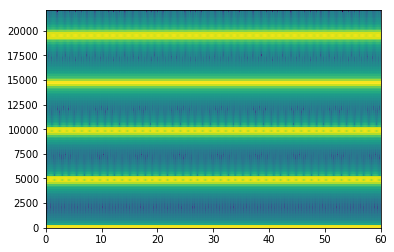

In [47]:
plotSpectrogram(file="test.wav")

In [48]:
# Matrix containing a triangle shaped pattern of 1 and 0
triangleMatrix = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])

In [163]:
def mapMatToFreq(pictureMat, duration=1.0, sampleRate=44100.0):
    max_freq = 10000 # Hz, audacity said so
    max_amplitude = 65534 # 32767*2, substract 32767 from the end value to get in range [-32767; 32767]
    max_frame = int(duration * sampleRate)
    # Each col is a frame, each row is a freq to play, zero means no freq to be played
    frameMat = np.zeros((pictureMat.shape[0], max_frame))
    
    stepFrame = int(max_frame / pictureMat.shape[1])
    stepFreq = int(max_freq  / pictureMat.shape[0])
    
    
    for frameRange in range(0, max_frame-stepFrame ,stepFrame):
        j = int(frameRange/stepFrame) # Col in pict matrix
        for frame in range(frameRange, frameRange+stepFrame):
            for freq in range(0,max_freq, stepFreq):
                i = int(freq/stepFreq) # Row in pict matrix
                value = math.cos(freq * math.pi * float(frame) / float(sampleRate))
                # Gets the amplitude right
                value = pictureMat[i,j]*max_amplitude * value - 32767
                frameMat[i,frame] = value
    return frameMat

In [164]:
32767*2

65534

In [173]:
lineMat = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])
lineMat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [174]:
frameMat = mapMatToFreq(lineMat)

In [175]:
sign = np.sign(frameMat)
sign

array([[-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.]])

In [224]:
def frameMatToWav(frameMat, file="sound.wav", duration=1.0, sampleRate=44100.0):
    wavef = wave.open(file,'w')
    wavef.setnchannels(1) # mono
    wavef.setsampwidth(2) 
    wavef.setframerate(sampleRate)

    max_frame = int(duration * sampleRate)
    for frame in range(max_frame):
        sumVal = 0
        countVal = 0
        for value in frameMat[:,frame]:
            if value > 0:
                sumVal += value
                countVal += 1
        countVal = 1 if countVal == 0 else countVal
        # Short int, little endian
        data = struct.pack('<h', int(sumVal/countVal))
        wavef.writeframesraw( data )
    wavef.writeframes(''.encode())
    wavef.close()

In [225]:
frameMatToWav(frameMat, file="test.wav")

File:  test.wav
Sample rate (Hz):  44100


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7176: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


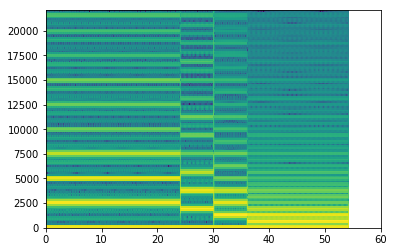

In [226]:
plotSpectrogram(file="test.wav")

In [230]:
def matToImage(mat):
    #img = Image.new("L", (frameMat.shape[1],frameMat.shape[0]), (0))
    #frameMat_color = frameMat / np.linalg.norm(frameMat) * 255
    X, Y = np.meshgrid(range(mat.shape[1]), range(mat.shape[0]))
    Z = mat[Y,X]

    plt.pcolormesh(X,Y,Z)
    plt.show()

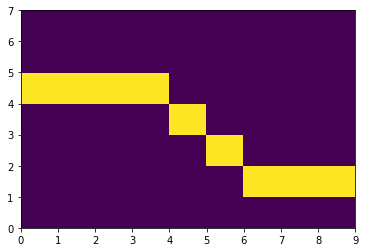

In [231]:
frameMatToImage(lineMat)

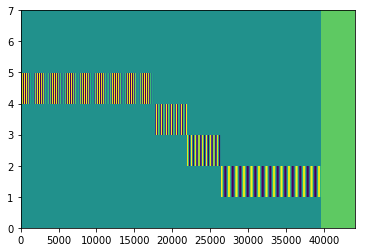

In [229]:
frameMatToImage(frameMat)

In [182]:
'''
    Creates a WAV file which spectrogram depicts lines at chosen frequencies
'''
def sumFreqs(freqs, file="sound.wav", duration=1.0, sampleRate=44100.0):
    # freqs is an array of frequencies in Hertz
    # file is the path to the wav file to output into
    # sampleRate in hertz
    # duration seconds

    wavef = wave.open(file,'w')
    wavef.setnchannels(1) # mono
    wavef.setsampwidth(2) 
    wavef.setframerate(sampleRate)

    max_frame = int(duration * sampleRate)
    for frame in range(max_frame):
        sumVal = 0
        countFreq = 0
        for freq in freqs:
            # Set the current frame value as the freq
            value = 32767.0*math.cos(freq * math.pi * float(frame) / float(sampleRate))
            sumVal += value
            countFreq += 1
        value = sumVal/countFreq
        # Short int, little endian
        data = struct.pack('<h', int(value))
        wavef.writeframesraw( data )
        
    wavef.writeframes(''.encode())
    wavef.close()

In [220]:
sumFreqs([x*2 for x in range(0,21000,10000)], file="soundSum.wav")
linearFreqs([x/2 for x in range(0,21000,10000)], file="soundLin.wav")

File:  soundSum.wav
Sample rate (Hz):  44100


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7176: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


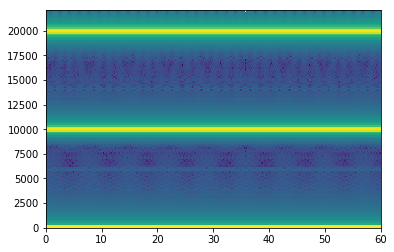

In [221]:
plotSpectrogram(file="soundSum.wav")

File:  soundLin.wav
Sample rate (Hz):  44100


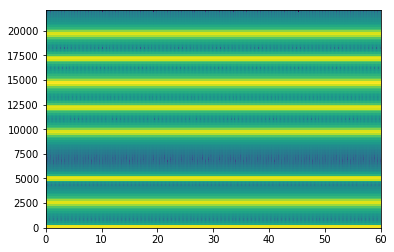

In [222]:
plotSpectrogram(file="soundLin.wav")